In [18]:
import pandas as pd
import numpy as np
%matplotlib inline

In [19]:
from pathlib import Path
csvpath = Path('../Resources/GSPC.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [20]:
df['Return'] = df.Close.pct_change() * 100
df['Lagged_Return'] = df.Return.shift()
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
1997-01-06,748.030029,753.309998,743.820007,747.650024,747.650024,531350000,-0.050801,1.495233
1997-01-07,747.650024,753.260010,742.179993,753.229980,753.229980,538220000,0.746333,-0.050801
1997-01-08,753.229980,755.719971,747.710022,748.409973,748.409973,557510000,-0.639912,0.746333
1997-01-09,748.409973,757.679993,748.409973,754.849976,754.849976,555370000,0.860491,-0.639912
1997-01-10,754.849976,759.650024,746.919983,759.500000,759.500000,545850000,0.616020,0.860491


# Slice the data into Training and Testing data

In [4]:
train = df.loc['2008':'2012']

test = df.loc['2013']

In [21]:
train.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
2008-01-02,1467.969971,1471.770020,1442.069946,1447.160034,1447.160034,3452650000,-1.443784,-0.685159
2008-01-03,1447.550049,1456.800049,1443.729980,1447.160034,1447.160034,3429500000,0.000000,-1.443784
2008-01-04,1444.010010,1444.010010,1411.189941,1411.630005,1411.630005,4166000000,-2.455155,0.000000
2008-01-07,1414.069946,1423.869995,1403.449951,1416.180054,1416.180054,4221260000,0.322326,-2.455155
2008-01-08,1415.709961,1430.280029,1388.300049,1390.189941,1390.189941,4705390000,-1.835227,0.322326


In [22]:
test.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,1462.420044,4202600000,2.540342,1.694194
2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,1459.369995,3829730000,-0.208562,2.540342
2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,1466.469971,3424290000,0.486510,-0.208562
2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,1461.890015,3304970000,-0.312312,0.486510
2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,1457.150024,3601600000,-0.324237,-0.312312


In [23]:
# Create dataframes for X_train and X_test
# Create series for y_train and y_test
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train["Lagged_Return"].to_frame()
X_test = test["Lagged_Return"].to_frame()
y_train = train["Return"].to_frame()
y_test = test["Return"].to_frame()

In [24]:
X_train.head()

,Lagged_Return
Date,
2008-01-02,-0.685159
2008-01-03,-1.443784
2008-01-04,0.000000
2008-01-07,-2.455155
2008-01-08,0.322326


In [25]:
y_train.head()

,Return
Date,
2008-01-02,-1.443784
2008-01-03,0.000000
2008-01-04,-2.455155
2008-01-07,0.322326
2008-01-08,-1.835227


# Fit the model to the Training Data

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
#Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions using the Testing Data

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [28]:
# And make a prediction of "y" values for just the test dataset
predictions = model.predict(X_test)

In [29]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test
Results["Predicted Return"] = predictions


In [30]:
Results.head()

,Return,Predicted Return
Date,,
2013-01-02,2.540342,-0.188503
2013-01-03,-0.208562,-0.288921
2013-01-04,0.486510,0.037312
2013-01-07,-0.312312,-0.045177
2013-01-08,-0.324237,0.049625


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

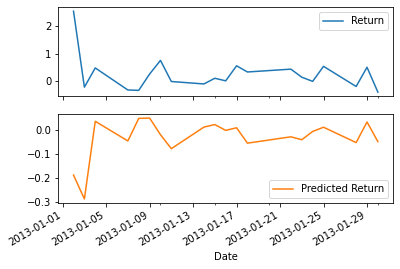

In [31]:
# Plot the first 20 predictions against the true values to see how it performed
# The trends lines should be similar
Results[:20].plot(subplots=True)

# Out-of-Sample Performance (Fitting model by using x_train set and predicting based on x_test)

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe above)
mse = mean_squared_error(
    Results["Return"],
    Results["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE) and r2:
rmse = np.sqrt(mse)
r2 = r2_score(Results["Return"], Results["Predicted Return"])
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")
print(f"Out-of-Sample r2: {r2}")



Out-of-Sample Root Mean Squared Error (RMSE): 0.7037691017337323
Out-of-Sample r2: -0.02278682633431206


# In-Sample Performance (Fitting model by using x_test set and predicting y based on x_test)

Evaluate the model using in-sample data (X_train and y_train)

Typically, out-of-sample errors are higher than in-sample errors.

In [33]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train

# Add a column of "in-sample" predictions to that DataFrame:  
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error and r2 value(for comparison to out-of-sample) 
in_sample_rmse = np.sqrt(in_sample_mse)
in_sample_r2 = r2_score(in_sample_results["Return"], in_sample_results["In-sample Predictions"])
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")
print(f"In-sample r2: {in_sample_r2}")

In-sample Root Mean Squared Error (RMSE): 1.6450198277763866
In-sample r2: 0.014074815142220531
